**Introdution to Pennylane**

PennyLane is an open-source Python library that allows us to build and simulate quantum and hybrid algorithms.
It allows us to run the algorithms locally in our CPUs, or externally in various GPUs, quantum simulators, and quantum devices.
Although it was initially developed for quantum machine learning applications, it has since developed to run algorithms for a wide array of areas in quantum computing research.
PennyLane is a community. Everyone can contribute to its growth and development.

**Installing Pennylane**

You can install Pennylane  by executing the following cell if you using  google Colab:

In [1]:
!pip -q install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.7 MB/s eta 0:00:00


You can install Pennylane by executing the following cell if you using jupter notebook :

In [ ]:
%pip -q install pennylane

**Quantum first program**

To build our first quantum circuit in PennyLane,We going to use quantum circuit,or quantum function which is a Python function that contains a list of gates that may depend on some parameters and act on some wires, i.e. qubits. In PennyLane, all wires are initialized in the state |0> by default.

def quantum_function(parameters)
   
    qml.gate1(parameters, wires)
    qml.gate2(wires)




**Execute an example quantum program**

1.Create a quantum circuit



In [6]:
#Import the objects from pennylane
import pennylane as qml
from pennylane import numpy as np

#Create a a device

dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def Quantum_circuit():
  qml.Hadamard(wires=0)
  qml.CNOT(wires=[0,1])
  print("The execution of the cell was completed, and the circuit was created :")
  return qml.sample(wires=[0, 1])



The execution of the cell was completed, and the circuit was created :


(<Figure size 500x300 with 1 Axes>, <Axes: >)

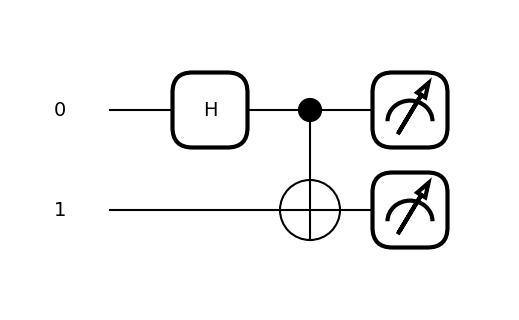

In [3]:
#drawing the circuit
qml.draw_mpl(Quantum_circuit)()

**Execute the circuit 1024 times in the local simulator and print the observed the outcomes**

In [7]:
import pennylane as qml
from pennylane import numpy as np
from collections import Counter

# Step 1: Define the new device
dev_new = qml.device("default.qubit", wires=2, shots=1024)

# Step 2: Define your quantum function (example circuit)
@qml.qnode(dev_new)
def Quantum_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0, 1])  # returns samples per shot

# Step 3: Execute the circuit and collect samples
samples = Quantum_circuit()

# Step 4: Convert each sample to a bitstring
bitstrings = ["".join(map(str, sample)) for sample in samples]

# Step 5: Count frequencies
counts = Counter(bitstrings)

# Step 6: Print results
print("Measurement counts:", counts)


Measurement counts: Counter({'00': 515, '11': 509})


**Complete test**

✅ Circuit executed successfully.
Measurement outcomes: Counter({'00111': 61, '01011': 60, '10011': 57, '00011': 56, '01010': 56, '00110': 54, '11110': 53, '11111': 52, '11011': 49, '11010': 49, '01110': 49, '01111': 48, '00010': 47, '10111': 45, '10010': 44, '10110': 39, '01101': 15, '01100': 15, '01001': 14, '01000': 14, '11000': 13, '10001': 12, '00000': 12, '00001': 12, '00101': 12, '10100': 12, '11101': 10, '00100': 10, '11100': 9, '10101': 8, '10000': 8, '11001': 5})


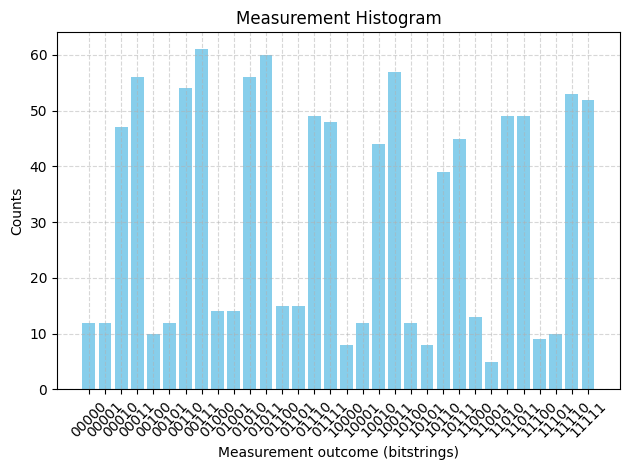


Quantum state vector:
0.000 + 0.000j
0.532 + 0.000j
0.847 + 0.000j
0.000 + 0.000j

Unitary matrix:
[[ 0.   +0.j  0.532+0.j  0.   +0.j  0.847+0.j]
 [ 0.532+0.j  0.   +0.j  0.847+0.j  0.   +0.j]
 [ 0.847+0.j  0.   +0.j -0.532+0.j  0.   +0.j]
 [ 0.   +0.j  0.847+0.j  0.   +0.j -0.532+0.j]]


In [25]:
import pennylane as qml
from pennylane import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from math import pi

# Define angles
a = pi / 7
b = 3 * pi / 11

# Set up a 5-qubit device with shots for measurement sampling
dev = qml.device("default.qubit", wires=5, shots=1000)

@qml.qnode(dev)
def QuantumCircuit():
    # Apply gates (same structure as Qiskit)
    qml.PauliX(wires=2)
    qml.PauliZ(wires=4)
    qml.Hadamard(wires=1)
    qml.RY(2 * a, wires=3)
    qml.CNOT(wires=[1, 0])
    qml.ctrl(qml.Rot, control=1)(2 * a, 0, 0, wires=0)
    qml.Toffoli(wires=[2, 1, 0])

    # Conditional logic like c_if not directly supported; skip or emulate in classical post-processing

    # More gates after "barrier"
    for i in range(5):
        if i % 2 == 0:
            qml.Hadamard(wires=i)
        else:
            qml.PauliX(wires=i)

    qml.ctrl(qml.Rot, control=1)(2 * b, 0, 0, wires=0)

    # Measure all qubits in the computational basis
    return qml.sample(wires=range(5))

# Run the circuit and count results
samples = QuantumCircuit()
bitstrings = ["".join(map(str, sample)) for sample in samples]
counts = Counter(bitstrings)

print("✅ Circuit executed successfully.")
print("Measurement outcomes:", counts)

# Plot histogram
sorted_keys = sorted(counts.keys())
sorted_values = [counts[k] for k in sorted_keys]

plt.bar(sorted_keys, sorted_values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Measurement outcome (bitstrings)")
plt.ylabel("Counts")
plt.title("Measurement Histogram")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ========== Unitary + Statevector version (no shots needed) ==========

# Re-define device with no shots to allow statevector/unitary inspection
dev2 = qml.device("default.qubit", wires=2)

@qml.qnode(dev2)
def small_unitary_circuit():
    qml.Hadamard(wires=0)
    qml.RY(a, wires=0)
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0,1])
    return qml.state()

state = small_unitary_circuit()
print("\nQuantum state vector:")
for val in state:
    print(f"{val.real:.3f} + {val.imag:.3f}j")

# Get the unitary matrix of the circuit
unitary = qml.matrix(small_unitary_circuit)()
print("\nUnitary matrix:")
print(np.round(unitary, 3))


**First Quantum program with Pennylane**

Now will be creating the first quantum program using pennylane here step by step

**Design Circuit**

In [9]:
import pennylane as qml
from pennylane import numpy as np
from collections import Counter

# ---------------------------
# DEVICE SETUP
# ---------------------------
# Create a quantum device with 1 qubit (wire) and 1000 measurement shots
dev = qml.device("default.qubit", wires=1, shots=1000)

# ---------------------------
# CIRCUIT DEFINITION
# ---------------------------
@qml.qnode(dev)
def circuit():
    # Apply the Pauli-X (NOT) gate to the first qubit (wire 0)
    qml.PauliX(wires=0)

    # Return measurement samples from the qubit
    return qml.sample(wires=0)

# ---------------------------
# RUN CIRCUIT & PROCESS OUTPUT
# ---------------------------
# Execute the circuit
samples = circuit()

# Count the frequency of each measurement outcome (0 or 1)
counts = Counter(samples)

# Display the circuit status and result
print("The design of the circuit is done.")
print("Measurement outcomes are:", counts)


The design of the circuit is done.
Measurement outcomes are: Counter({np.int64(1): 1000})


**Visualize the circuit**

In [10]:
import pennylane as qml
from pennylane import numpy as np

# Create a device with 1 qubit
dev = qml.device("default.qubit", wires=1)

# Define the circuit
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    return qml.probs(wires=0)  # return probabilities instead of samples (no shots needed)

# Print a textual diagram of the circuit
print("ASCII circuit diagram:")
print(qml.draw(circuit)())  # similar to qiskit's qc.draw()


ASCII circuit diagram:
0: ──X─┤  Probs


(<Figure size 400x200 with 1 Axes>, <Axes: >)

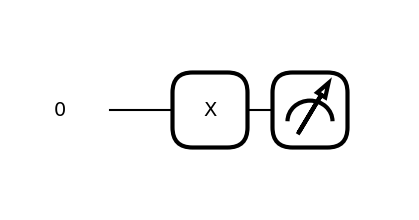

In [11]:
#we can draw the circuit by using matplotlib
qml.draw_mpl(circuit)()

**Exeecute the circuit**

In [12]:
import pennylane as qml
from pennylane import numpy as np
from collections import Counter

# -------------------------------
# DEVICE SETUP
# -------------------------------
# Create a quantum device with 1 wire and 1024 shots (repetitions)
dev = qml.device("default.qubit", wires=1, shots=1024)

# -------------------------------
# CIRCUIT DEFINITION
# -------------------------------
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)  # Apply NOT gate
    return qml.sample(wires=0)  # Sample measurement result from qubit 0

# -------------------------------
# CIRCUIT EXECUTION
# -------------------------------
samples = circuit()

# Convert results to a dictionary of counts (like Qiskit's get_counts)
counts = Counter(samples)

# Print measurement result frequencies
print(counts)  # Same output style as Qiskit: {0: ..., 1: ...}


Counter({np.int64(1): 1024})


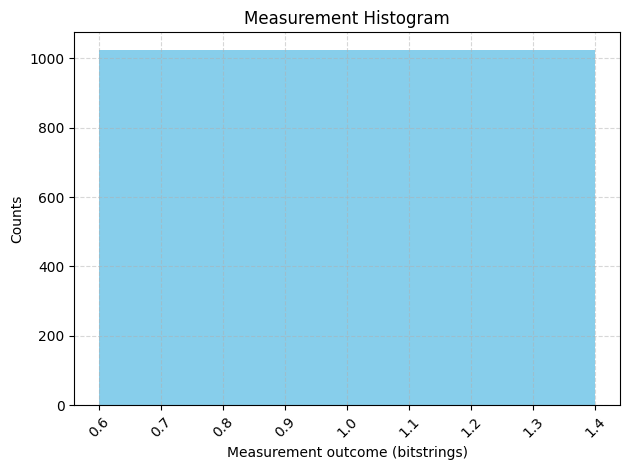

In [13]:
# Plot histogram
import matplotlib.pyplot as plt

# Sort the keys for better display
sorted_keys = sorted(counts.keys())
sorted_values = [counts[k] for k in sorted_keys]

plt.bar(sorted_keys, sorted_values, color='skyblue')
plt.xticks(rotation=45)  # Rotate for readability
plt.xlabel("Measurement outcome (bitstrings)")
plt.ylabel("Counts")
plt.title("Measurement Histogram")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**A quantum circuit with more quantum bits**

In [14]:
import pennylane as qml
from pennylane import numpy as np

# Create a device with 4 qubits, sampling in the computational basis
dev = qml.device("default.qubit", wires=4, shots=1)

# Define the quantum node (qnode)
@qml.qnode(dev)
def circuit():
    # Apply X-gate (Pauli-X) to the first qubit twice (has no effect)
    qml.PauliX(wires=0)
    qml.PauliX(wires=0)

    # Apply X-gate to the fourth qubit (index 3)
    qml.PauliX(wires=3)

    # Apply X-gate to the third qubit (index 2) three times => overall X
    qml.PauliX(wires=2)
    qml.PauliX(wires=2)
    qml.PauliX(wires=2)

    # Apply X-gate to the second qubit (index 1) four times => identity
    qml.PauliX(wires=1)
    qml.PauliX(wires=1)
    qml.PauliX(wires=1)
    qml.PauliX(wires=1)

    # Return a sample of all qubits (simulate measurement)
    return qml.sample(wires=range(4))

# Run the circuit
result = circuit()

# Display the circuit structure (optional)
print(qml.draw(circuit)())

# Print the result of measurement
print("The design of the circuit is done.")
print("Measurement result (bitstring):", result)

0: ──X──X───────┤ ╭Sample
1: ──X──X──X──X─┤ ├Sample
2: ──X──X──X────┤ ├Sample
3: ──X──────────┤ ╰Sample
The design of the circuit is done.
Measurement result (bitstring): [0 0 1 1]


(<Figure size 700x500 with 1 Axes>, <Axes: >)

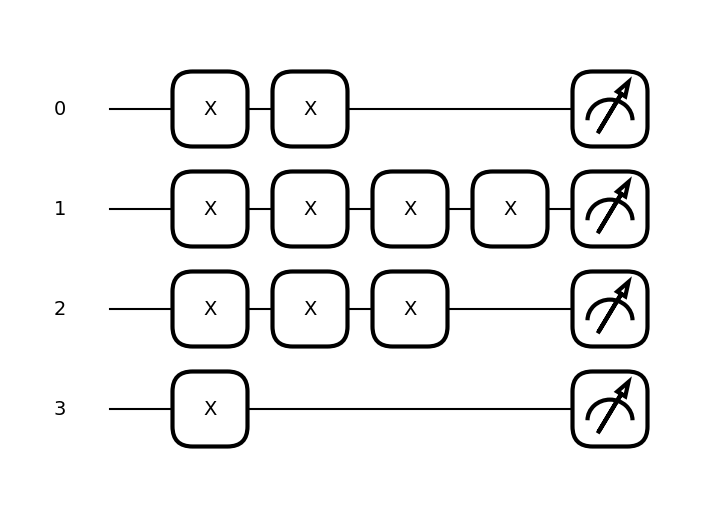

In [15]:
qml.draw_mpl( circuit)()

# Task 1

Guess the outcome by checking the circuit.Then, compare your guess with the result obtained after executing our circuit 100 times.

In [16]:
import pennylane as qml
from pennylane import numpy as np
from collections import Counter

# Set up device with 4 wires and 100 shots
dev = qml.device("default.qubit", wires=4, shots=100)

# Define a QNode circuit that returns samples
@qml.qnode(dev)
def circuit():
    # Sample gates
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    qml.RY(np.pi / 4, wires=2)
    qml.CNOT(wires=[0, 3])
    return qml.sample(wires=[0, 1, 2, 3])  # returns samples (100 x 4)

# Run the circuit and get samples
samples = circuit()

# Convert each sample from array to bitstring (row-wise)
bitstrings = ["".join(str(bit) for bit in sample) for sample in samples]

# Count occurrences
counts = Counter(bitstrings)

# Print counts
print("The design of the circuit is done.")
print("Measurement counts:", counts)


The design of the circuit is done.
Measurement counts: Counter({'1101': 39, '0100': 38, '0110': 12, '1111': 11})


**Reading order**

**Pick a Random number in python**

In the following task, you will be asked to apply x-gate to randomly picked quantum bits.

Here is one of the methods to pick a random number in python.

In [17]:
from random import randrange
n = 20
r=randrange(n) # pick a number from the list {0,1,...,n-1}
print(r)

# test this method by using a loop
for i in range(10):
    print(randrange(n))

6
19
1
5
0
13
4
11
6
17
8


**Task 2**

Design a quantum circuit with 8 quantum bits and 8 classical bits.

For each quantum bit, flip a coin by python, and apply x-gate if the outcome is head.

Measure your quantum bits.

Execute your circuit 10 times.

Repeat this task as much as you want, and enjoy your random choices.

In [18]:
#
#your solution is here

[link to solution](https://)